In [1]:
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns

In [2]:
# پوشاک و کفش
R98_kafsh = pd.read_excel('R98.xlsx', sheet_name='R98P3S03')
U98_kafsh = pd.read_excel('U98.xlsx', sheet_name='U98P3S03')
R99_kafsh = pd.read_excel('R99.xlsx', sheet_name='R99P3S03')
U99_kafsh = pd.read_excel('U99.xlsx', sheet_name='U99P3S03')
R1400_kafsh = pd.read_excel('R1400.xlsx', sheet_name='R1400P3S03')
U1400_kafsh = pd.read_excel('U1400.xlsx', sheet_name='U1400P3S03')
R1401_kafsh = pd.read_excel('R1401.xlsx', sheet_name='R1401P3S03')
U1401_kafsh = pd.read_excel('U1401.xlsx', sheet_name='U1401P3S03')

In [16]:
R98_kafsh = pd.read_excel('R98.xlsx', sheet_name='R98P3S03')

In [3]:
# خوراکی
R98_khoraki = pd.read_excel('R98.xlsx', sheet_name='R98P3S01')
U98_khoraki = pd.read_excel('U98.xlsx', sheet_name='U98P3S01')
R99_khoraki = pd.read_excel('R99.xlsx', sheet_name='R99P3S01')
U99_khoraki = pd.read_excel('U99.xlsx', sheet_name='U99P3S01')
R1400_khoraki = pd.read_excel('R1400.xlsx', sheet_name='R1400P3S01')
U1400_khoraki = pd.read_excel('U1400.xlsx', sheet_name='U1400P3S01')
R1401_khoraki = pd.read_excel('R1401.xlsx', sheet_name='R1401P3S01')
U1401_khoraki = pd.read_excel('U1401.xlsx', sheet_name='U1401P3S01')

In [49]:
# مسکن
R98_maskan = pd.read_excel('R98.xlsx', sheet_name='R98P3S04')
U98_maskan = pd.read_excel('U98.xlsx', sheet_name='U98P3S04')
R99_maskan = pd.read_excel('R99.xlsx', sheet_name='R99P3S04')
U99_maskan = pd.read_excel('U99.xlsx', sheet_name='U99P3S04')
R1400_maskan = pd.read_excel('R1400.xlsx', sheet_name='R1400P3S04')
U1400_maskan = pd.read_excel('U1400.xlsx', sheet_name='U1400P3S04')
R1401_maskan = pd.read_excel('R1401.xlsx', sheet_name='R1401P3S04')
U1401_maskan = pd.read_excel('U1401.xlsx', sheet_name='U1401P3S04')

In [5]:
# بهداشتی
R98_behdashti = pd.read_excel('R98.xlsx', sheet_name='R98P3S06')
U98_behdashti = pd.read_excel('U98.xlsx', sheet_name='U98P3S06')
R99_behdashti = pd.read_excel('R99.xlsx', sheet_name='R99P3S06')
U99_behdashti = pd.read_excel('U99.xlsx', sheet_name='U99P3S06')
R1400_behdashti = pd.read_excel('R1400.xlsx', sheet_name='R1400P3S06')
U1400_behdashti = pd.read_excel('U1400.xlsx', sheet_name='U1400P3S06')
R1401_behdashti = pd.read_excel('R1401.xlsx', sheet_name='R1401P3S06')
U1401_behdashti = pd.read_excel('U1401.xlsx', sheet_name='U1401P3S06')

### concat for U and R

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

R_dfs = ['R98', 'R99', 'R1400', 'R1401']
U_dfs = ['U98', 'U99', 'U1400', 'U1401']

def process_dataframes(df_names):
    combined_data = None
    for df_name in df_names:
        df_maskan = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S04')
        df_shoe = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S03')
        df_khoraki = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S01')
        df_behdashti = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S06')

        df_maskan['code'] = df_maskan['code'].astype(str)
        khune = df_maskan[df_maskan['code'].str.startswith(('41', '42'))]
        ab = df_maskan[df_maskan['code'].str.startswith('441')]
        fazelab = df_maskan[df_maskan['code'].str.startswith(('443', '444'))]
        sookht = df_maskan[df_maskan['code'].str.startswith('45')]

        shoe_per_family = df_shoe.groupby('Address')['value'].sum().reset_index()
        khoraki_per_family = df_khoraki.groupby('Address')['value'].sum().reset_index()
        behdashti_per_family = df_behdashti.groupby('Address')['value'].sum().reset_index()
        khune_per_family = khune.groupby('Address')['value'].sum().reset_index()
        ab_per_family = ab.groupby('Address')['value'].sum().reset_index()
        fazelab_per_family = fazelab.groupby('Address')['value'].sum().reset_index()
        sookht_per_family = sookht.groupby('Address')['value'].sum().reset_index()

        merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe', '_khoraki')) \
                                     .merge(behdashti_per_family, on='Address') \
                                     .merge(khune_per_family, on='Address') \
                                     .merge(ab_per_family, on='Address') \
                                     .merge(fazelab_per_family, on='Address') \
                                     .merge(sookht_per_family, on='Address')

        merged_data.columns = ['Address', 'shoe', 'khoraki', 'behdashti', 'khune', 'ab', 'fazelab', 'sookht']

        if combined_data is None:
            combined_data = merged_data
        else:
            combined_data = pd.concat([combined_data, merged_data], ignore_index=True)

    return combined_data

R_combined = process_dataframes(R_dfs)
U_combined = process_dataframes(U_dfs)

R_correlation_data = R_combined.drop('Address', axis=1)
U_correlation_data = U_combined.drop('Address', axis=1)
R_correlation_matrix = R_correlation_data.corr()
U_correlation_matrix = U_correlation_data.corr()

/var/folders/26/nnnq65hx7xx_2p1x14bph3zc0000gn/T/ipykernel_4787/1202790752.py:30: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe', '_khoraki')) \
/var/folders/26/nnnq65hx7xx_2p1x14bph3zc0000gn/T/ipykernel_4787/1202790752.py:30: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe', '_khoraki')) \
/var/folders/26/nnnq65hx7xx_2p1x14bph3zc0000gn/T/ipykernel_4787/1202790752.py:30: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('

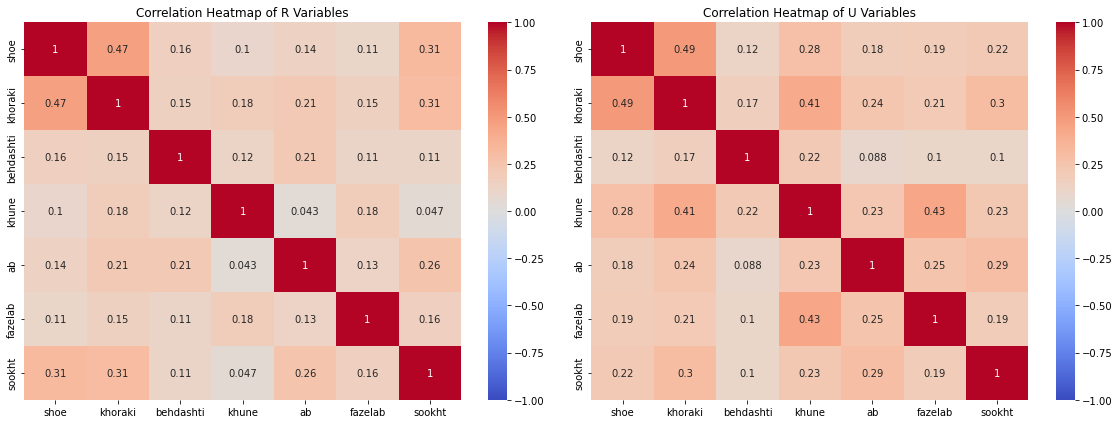

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(R_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation Heatmap of R Variables')

sns.heatmap(U_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation Heatmap of U Variables')

plt.tight_layout()
plt.show()

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

maskan_dfs = ['R98', 'R99', 'R1400', 'R1401', 'U98', 'U99', 'U1400', 'U1401']


correlation_matrices = []
for df_name in maskan_dfs:
    df_maskan = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S04')
    df_shoe = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S03')
    df_khoraki = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S01')
    df_behdashti = pd.read_excel(f'{df_name}.xlsx', sheet_name=f'{df_name}P3S06')

    df_maskan['code'] = df_maskan['code'].astype(str)
    khune = df_maskan[df_maskan['code'].str.startswith(('41', '42'))]
    ab = df_maskan[df_maskan['code'].str.startswith('441')]
    fazelab = df_maskan[df_maskan['code'].str.startswith(('443', '444'))]
    sookht = df_maskan[df_maskan['code'].str.startswith('45')]

    shoe_per_family = df_shoe.groupby('Address')['value'].sum().reset_index()
    khoraki_per_family = df_khoraki.groupby('Address')['value'].sum().reset_index()
    behdashti_per_family = df_behdashti.groupby('Address')['value'].sum().reset_index()
    khune_per_family = khune.groupby('Address')['value'].sum().reset_index()
    ab_per_family = ab.groupby('Address')['value'].sum().reset_index()
    fazelab_per_family = fazelab.groupby('Address')['value'].sum().reset_index()
    sookht_per_family = sookht.groupby('Address')['value'].sum().reset_index()

    merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe', '_khoraki')) \
                                 .merge(behdashti_per_family, on='Address') \
                                 .merge(khune_per_family, on='Address') \
                                 .merge(ab_per_family, on='Address') \
                                 .merge(fazelab_per_family, on='Address') \
                                 .merge(sookht_per_family, on='Address')

    merged_data.columns = ['Address', 'shoe', 'khoraki', 'behdashti', 'khune', 'ab', 'fazelab', 'sookht']

    correlation_data = merged_data.drop('Address', axis=1)
    correlation_matrix = correlation_data.corr()
    correlation_matrices.append(correlation_matrix)

/var/folders/26/nnnq65hx7xx_2p1x14bph3zc0000gn/T/ipykernel_4787/13466173.py:29: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe', '_khoraki')) \
/var/folders/26/nnnq65hx7xx_2p1x14bph3zc0000gn/T/ipykernel_4787/13466173.py:29: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe', '_khoraki')) \
/var/folders/26/nnnq65hx7xx_2p1x14bph3zc0000gn/T/ipykernel_4787/13466173.py:29: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data = shoe_per_family.merge(khoraki_per_family, on='Address', suffixes=('_shoe'

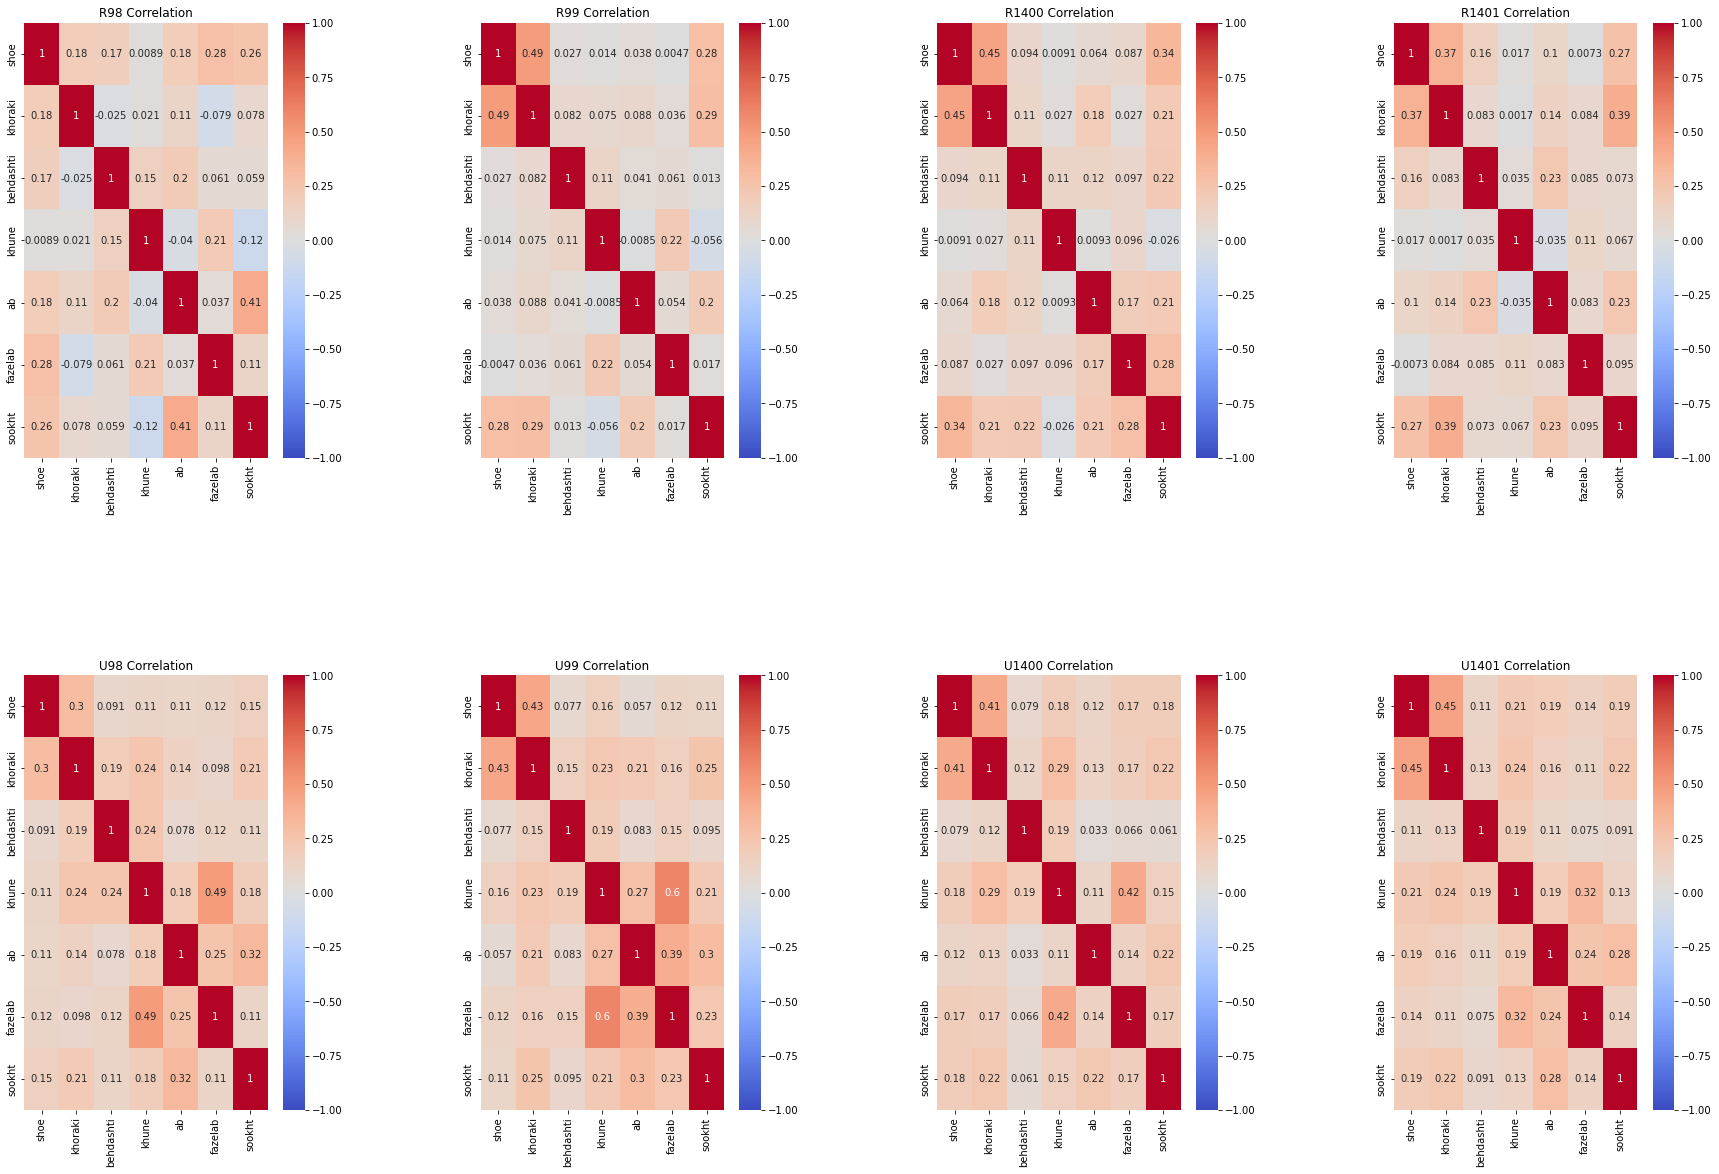

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 20))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i, correlation_matrix in enumerate(correlation_matrices):
    row = i // 4 
    col = i % 4  
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[row, col])
    axes[row, col].set_title(f'{maskan_dfs[i]} Correlation')
plt.show()